#### Source: Nadim Kawwa (Feb 14, 2020) :
https://towardsdatascience.com/when-to-use-the-kolmogorov-smirnov-test-dd0b2c8a8f61#:~:text=The%20KS%20test%20is%20a,or%20to%20compare%20two%20samples.&text=The%20KS%20test%20is%20used,do%20indeed%20come%20from%20P

(Code: https://github.com/NadimKawwa/Statistics)


In [34]:
# pip install pandas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as st

#%matplotlib inline
#%matplotlib qt # for popup, interactive window

Extra info: http://www.stats.ox.ac.uk/~massa/Lecture%2013.pdf , http://www.physics.csbsju.edu/stats/KS-test.html

The Kolmogorov–Smirnov (KS) test is a non parametric and distribution free test: It makes no assumption about the distribution of data.
The KS test that can be used to compare a sample with with a reference probability distribution, or to compare two samples. In this first section we are going to justify the need for a KS test and how it can account for shortcomings from the student t-test.


# KS For Two Samples

Given two samples, test if their distributions are the same.Compute the observed cumulative distribution functions of the two samples and compute their maximum difference.

Null Hypothesis: The samples do indeed come from P

Alternative Hypothesis: The samples do not come from P

If our maximum difference is less than D_Crit we fail to reject the null hypothesis
Meaning: if d_crit > d_n, accept null hypothesis.

In [2]:
# Comparison set - interval in minutes
x = [762686,5,2,13,5,4,292,7,3067,5,354,135,62,5,2,5,4,4,28270,1328,25,646,10,11,4537,162,5,299,28,6,994,249,43,45002,170,6,1164,6,92,25,46,169,470,9,12,3,7,7,31498,6,10,11,15354,43,6,185,29,459,29,2318,7,734,2,28,42,10,13,22194,13436,9,32,12,7,5,8,1,204,3141,18,8,40,5,21,4,91,40,3,7,11,909,61670,1233,60,21,70318,78,49091,11,49,47,17,417,31,88,19,10449,1280,35,90,211,4,4,17893,4,8,7,447,24,27,4214,117,32,11,8,30096,10,20,2806,40,6,34,42986,9,805,22,39107,62,397,507046,173,183,19517,1,0,5,4,70,18926,1668,1527,8,8,5,122,8,15,13312,10,58,10,890,9,55,44,31,7381,24,3243,28,4230,6,27,4,28,1127,2721,28,82,3,71306,7,3,38,88409,33,447,421,10,27,16,42,1234,8,2,568,9,80647,1623,4,1,322,85,5,5,72,3,197,78,90,45,2,8,244,121,1813,4070,1350,5,12,130,15,3,9,173,322517,30,51,9,121396,29,4,21,3,3,528,10,3,67,175,5,1552152,755,784,1532,210,3501,6]

# OpenCV dataset - interval in minutes
y = [56,214,1146,104,589,188121,27,8767,7,44,1237,14,1950,5,1505,1184,156,14,197,2850,91,618,20,400,261812,369,373,38,269,29,59,119,31,22,4,1742,23,178,33,1804,238,87,14,363,9,1170,191566,29,1396,135,326,21,20,58,165,18,19,119,3901,374,958,117,113,24,43072,584,31743,8782,759,482,29,6,1990,75,153,28,462,239,98,14,1515,407,12745,17,996,53,371,43,16,10,41,1669,54492,26,137,73,338,836896,56,136,195,50,362,483,3272,14,195,99,143,21,653,162,172398,949,375,742,1979,345,2531,5,2803,82089,6,234,1133,18669,489,106,50,6,9,4,101,31,458,2552,52,2206,1494,7688,1308,39,603,7128,2509,20207,941,12663,44,52,101,9025,488,298403,47,677,313784,52349,290750,531,10,1392,41,11608,17,13,1008,47,10,210,20611,2468,124,96552,213,455,1493,1510,2440,6981,697,2094,6,10572,4499,160943,166,4,1055,10,41,663,117,12,71,40,39,14,31,9,298,725672,6,32,7,1052,1063,28,517,419,12,16294,69,210,6,77,458,21,1,27,25,9,19,202,23,7,2373,56,1099,27,35,164,598,749,1013,99,482,125,6,752541,69886,54,42,15678,14,98,301]

x_y = np.sort(np.concatenate((x, y)))
x_y

array([      0,       1,       1,       1,       1,       2,       2,
             2,       2,       2,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       4,       4,
             4,       4,       4,       4,       4,       4,       4,
             4,       4,       4,       4,       4,       5,       5,
             5,       5,       5,       5,       5,       5,       5,
             5,       5,       5,       5,       5,       5,       5,
             6,       6,       6,       6,       6,       6,       6,
             6,       6,       6,       6,       6,       6,       6,
             6,       7,       7,       7,       7,       7,       7,
             7,       7,       7,       7,       7,       8,       8,
             8,       8,       8,       8,       8,       8,       8,
             9,       9,       9,       9,       9,       9,       9,
             9,       9,       9,       9,      10,      10,      10,
            10,     

In [17]:
x_cdf = [np.round(st.percentileofscore(x, samp)/100, 1) for samp in x_y] # /100 to make the percentiles into fractions
y_cdf = [np.round(st.percentileofscore(y, samp)/100, 1) for samp in x_y]

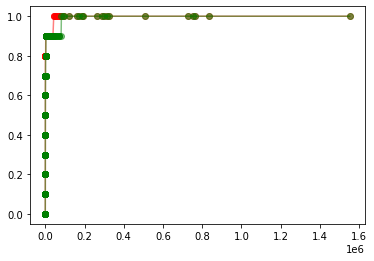

In [29]:
plt.plot(x_y, x_cdf, label='x', alpha=0.5, marker='o', color='red')
plt.plot(x_y, y_cdf, label='y', alpha=0.5, marker='o', color='green')
plt.show()

In [19]:
abs_diff_example = np.abs(np.subtract(x_cdf, y_cdf))
abs_diff_example

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.

In [20]:
print(max(abs_diff_example)) # this is d_n

0.30000000000000004


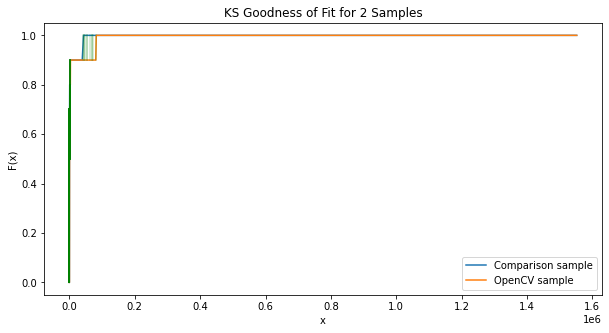

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(x_y, x_cdf, label='Comparison sample')
plt.plot(x_y, y_cdf, label='OpenCV sample')

for val, p1, p2 in zip(x_y, x_cdf, y_cdf):
    plt.plot([val, val], [p1, p2], color='green', alpha=0.2)

plt.legend()
plt.ylabel("F(x)")
plt.xlabel('x')
plt.title("KS Goodness of Fit for 2 Samples")

plt.show()

In [22]:
def d_crit_two_way(arr1, arr2):
    return 1.36*np.sqrt(len(arr1)**-1 + len(arr2)**-1)

In [23]:
d_crit_two_way(x, y)

0.12237858562111055

0.12237858562111055 < 0.30000000000000004

d_crit < d_n




So reject the null hypothesis that the Comparison set and OpenCV dataset are drawn from the same distribution.

Conclusion: Their differences are statistically significant.